<a href="https://colab.research.google.com/github/Fidhasainabs/Fidha-Sainab-s-task-8/blob/main/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

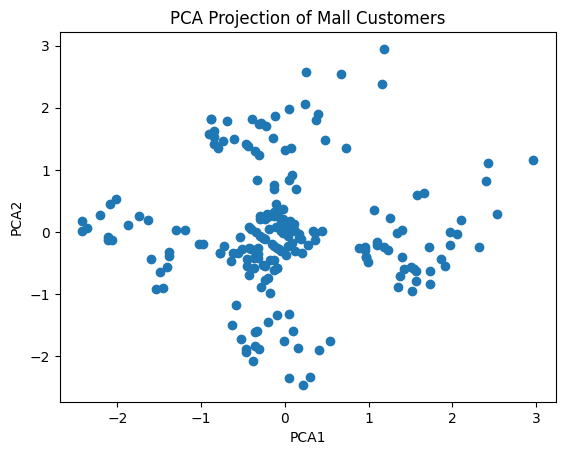

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA Projection of Mall Customers")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels


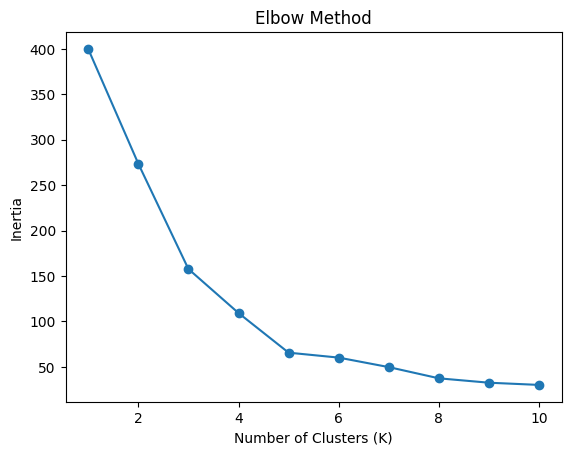

In [3]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


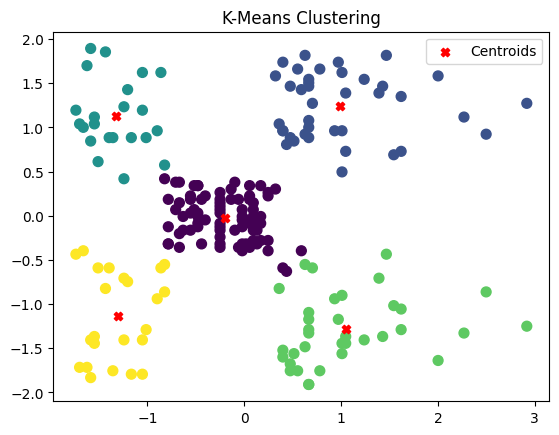

In [4]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()


In [5]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {score:.2f}')


Silhouette Score: 0.55
